# Toggle_Learing_Rate_On_GradientDecsent




### PROLOGUE: 
This Note book build upon our previous notebook "Vanilla Gradient Decsent From Scratch" which is present in my repository and has extreme;y detailed comments. In this notebook ,we build on top of that notebook and try to toggle learning rate to observe its effects on convergence.We jump right into toggling learning rate , so if the reader needs more of a background , I would reccommend going through the previous notebook

### PROJECT OBJECTIVE: 
To toggle learning rate Gradient Descent and observe 


### CODE/SOLUTION SUMMARY
- Toggle learning rate and log observations

In [68]:
# Import  libraries

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import sys
import numpy as np
import seaborn as sns
import statistics as stats
sns.set(color_codes=True)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#Last import allows multiple outputs from one cell
import warnings
# Initialize the random number generator
import random
random.seed(101)

In [69]:
# Useful Configuration/Setting

# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.7f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

#Setting to shows all entries in array displayed
np.set_printoptions(threshold=sys.maxsize)

In [70]:
# Lets create a  2 D data set manually

X=np.arange(2,20,2)
Y=2*X + 3

In [71]:
X

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])

In [72]:
Y

array([ 7, 11, 15, 19, 23, 27, 31, 35, 39])

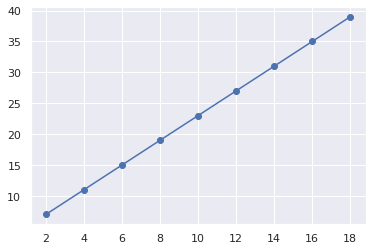

In [73]:
# Lets visualize the Actual Data Set

plt.scatter(x=X,y=Y)
plt.plot(X,Y,c='b')
plt.show()

In [74]:
# Note :
# Variables naming convention
# We have used small letters for scalars and CAPS for Vectors

In [75]:
# Lets define our loss function 

def MSE(Y_True,Y_Pred):
  loss=np.sum(np.square(Y_Pred-Y_True))/Y_True.shape[0]
  return loss


In [76]:
# Lets define our linear function
def linearFunc(X,W):
  Y=W[0]*X +  W[1]
  return Y


In [77]:
# Start at a random weight
W=np.ones(shape=2)
W[0]=random.randint(5,10)
W[1]=random.randint(5,10)

In [78]:
print(W[0])
print(W[1])

9.0
6.0


In [79]:
# Now we have some random weights , lets visualize what the predicted line ...
# ... looks like with these weights agianst the actual line

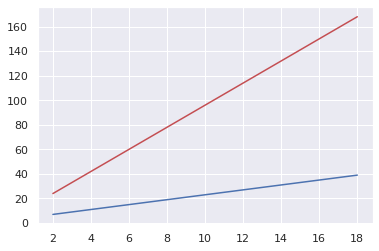

In [80]:
# Lets see what the line looks like at this point
plt.plot(X,linearFunc(X,W),c='r')# predicted line in red
plt.plot(X,Y,c='b')# actual line in blue

In [81]:
# We can see the predicted line and actual line in the above

##  Calculate Derivatives

In [82]:
# Lets write a func to calculate these gradients
'''Make note that we will be calcuating gradient at different points on the loss function as we try to make ...
our way to the minima for every combination of weighst(m & c) that we are at.
Therefore the gradient function will take inputs as X(Input data points), Y(Actual Values), P(Predicted Values) and give us 
the corresponding gradients of 'm' and 'c' at that point '''

def grad(X,Y,P):
  '''Note here that we are going to realise this operation of calcuating gradient as one singly operation ...
  insetad of doing seperately for m anc c. The final gradient will be a vector where one element corresponds to m ...
  and one to c . So we will use the formula summation xi(y-yi) to calcuate both derivatives .Note only one of them had x into...
  so just to make up for that we will add a dummy layer of 1's in the x part of that deriative which does not have x multiplied ...
  with y-yi which for derivative of c because we canot do a multiplication op otherwise'''
  
  # add  a dummy layer of 1 's 
  X1=np.vstack((np.ones_like(X),X))

  #calculate term in derivative which we will need later
  E=P-Y

  #calculate number of samples 
  N=np.shape(X)[0]

  #Calculate gradient 
  G=-1/N*(X.dot(E))

  return G

"Make note that we will be calcuating gradient at different points on the loss function as we try to make ...\nour way to the minima for every combination of weighst(m & c) that we are at.\nTherefore the gradient function will take inputs as X(Input data points), Y(Actual Values), P(Predicted Values) and give us \nthe corresponding gradients of 'm' and 'c' at that point "

In [83]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [9. 6.]
X [ 2  4  6  8 10 12 14 16 18]
Y [ 7 11 15 19 23 27 31 35 39]


In [84]:
W_Copy=W.copy()

##  Implement Gradient Descent with LR 0.001

In [85]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [9. 6.]
X [ 2  4  6  8 10 12 14 16 18]
Y [ 7 11 15 19 23 27 31 35 39]


currLoss 4945.358796296297
deltaLoss 1690.3078703703695
weightUpdate -0.9166666666666666


currLoss 3685.6660453446507
deltaLoss 1259.6927509516468
weightUpdate -0.7913888888888888


currLoss 2746.9068079628155
deltaLoss 938.7592373818352
weightUpdate -0.6832324074074074


currLoss 2047.333661935863
deltaLoss 699.5731460269526
weightUpdate -0.5898573117283951


currLoss 1526.0193426710325
deltaLoss 521.3143192648304
weightUpdate -0.5092434791255144


currLoss 1137.5544023299867
deltaLoss 388.4649403410458
weightUpdate -0.43964687031169414


currLoss 848.0951903689262
deltaLoss 289.45921196106053
weightUpdate -0.37956179803576257


currLoss 632.418281688975
deltaLoss 215.67690867995123
weightUpdate -0.32768835230420834


currLoss 471.7250489219523
deltaLoss 160.69323276702266
weightUpdate -0.28290427748929986


currLoss 352.00534530038584
deltaLoss 119.71970362156645
weightUpdate -0.24424069289909547


currLoss 262.8179130235772
deltaLoss 89.18743227680864
weightUpdate -0.2108611315362191


currLoss 196.38139179641846
deltaLoss 66.43652122715875
weightUpdate -0.1820434435596025


currLoss 146.89682814843428
deltaLoss 49.484563647984174
weightUpdate -0.15716417293979013


currLoss 110.04272969577002
deltaLoss 36.85409845266426
weightUpdate -0.13568506930468546


currLoss 82.59872233361028
deltaLoss 27.444007362159738
weightUpdate -0.11714144316637844


currLoss 62.16505876362026
deltaLoss 20.433663569990024
weightUpdate -0.1011321126003067


currLoss 46.95356742984197
deltaLoss 15.21149133377829
weightUpdate -0.08731072387826481


currLoss 35.6318475675956
deltaLoss 11.321719862246368
weightUpdate -0.07537825828156859


currLoss 27.207149566817016
deltaLoss 8.424698000778584
weightUpdate -0.06507656298308755


currLoss 20.939833372570135
deltaLoss 6.267316194246881
weightUpdate -0.05618276604206557


currLoss 16.27887168261056
deltaLoss 4.660961689959574
weightUpdate -0.048504454682983304


currLoss 12.813783223906603
deltaLoss 3.465088458703958
weightUpdate -0.04187551254297559


currLoss 10.238811330546538
deltaLoss 2.5749718933600647
weightUpdate -0.03615252582876889


currLoss 8.326228827098225
deltaLoss 1.9125825034483128
weightUpdate -0.031211680632170478


currLoss 6.906444581590896
deltaLoss 1.419784245507329
weightUpdate -0.026946084279107184


currLoss 5.853179151814625
deltaLoss 1.0532654297762711
weightUpdate -0.023263452760962495


currLoss 5.072418226238444
deltaLoss 0.7807609255761809
weightUpdate -0.0200841142169643


currLoss 4.494181455446032
deltaLoss 0.5782367707924116
weightUpdate -0.017339285273979207


currLoss 4.066389401792447
deltaLoss 0.42779205365358486
weightUpdate -0.014969582953202016


currLoss 3.7502940357468373
deltaLoss 0.31609536604561006
weightUpdate -0.012923739949597769


currLoss 3.517074376454611
deltaLoss 0.2332196592922262
weightUpdate -0.011157495489819383


currLoss 3.3453003617908044
deltaLoss 0.1717740146638067
weightUpdate -0.009632637772877418


currLoss 3.2190436720803604
deltaLoss 0.12625668971044401
weightUpdate -0.008316177277250847


currLoss 3.1264706048812667
deltaLoss 0.09257306719909364
weightUpdate -0.007179633049359893


currLoss 3.0587941123995304
deltaLoss 0.06767649248173635
weightUpdate -0.006198416532614044


currLoss 3.0094934252914958
deltaLoss 0.04930068710803459
weightUpdate -0.005351299606490113


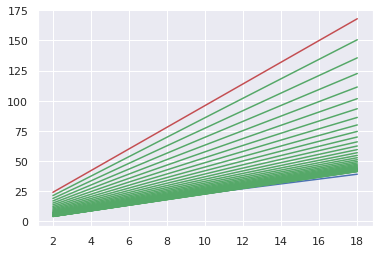

In [86]:
# Lets use LR as 0.0001
lr=0.001
totalIterCount=100 # Total no of iterations allowed
itercount=0 #Current iteration number
lossThresh=0.05
deltaLoss=5  # Intially we set an arbitrary value greater than lossThresh
P=linearFunc(X,W)
initLoss=MSE(Y,P) # This is loss with current weights

# Lets plot the actual line and initial line 
plt.plot(X,linearFunc(X,W),c='r')# starting line in red
plt.plot(X,Y,c='b')# actual line in blue


# We will now do multiple iterations
# Stopping condition ? Either max iterations are reached or the loss is not reducing beyond a fixed threshold

while(True):
  if(itercount>=200):
    break
  if(deltaLoss <= lossThresh):
    break
  else:
    gradient=grad(X,Y,P)  #Calculate the gradient at this point
    W=W + lr*gradient
    P=linearFunc(X,W)     #Prediction with current weights
    currLoss=MSE(Y,P)     #Lets update the weights 
    print('currLoss',currLoss)
    deltaLoss=initLoss-currLoss  # Calculate diff in loss
    print('deltaLoss',deltaLoss)
    print('weightUpdate',lr*gradient)
    initLoss=currLoss
    itercount=itercount+1
    plt.plot(X,linearFunc(X,W),c='g')#  line after one iteration in green



##  Result with LR 0.001


In [87]:
currLoss

3.0094934252914958

In [88]:
deltaLoss

0.04930068710803459

In [89]:
itercount

36

In [90]:
W

array([ 2.32648748, -0.67351252])

- As can be seen in the graph above , the gradient descent algorithm was able to reach the best fit line through an iterative process
- Each green line indicates one iteration
- Vanilla Gradient descent took 36 iterations to reach the best fit line i.e minima of the loss curve
- This is the result when we set LR as 0.001 which is an optimum value

##  Implement Gradient Descent with LR 0.1

In [91]:
# Update the W back to the original
W=W_Copy.copy()

In [92]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [9. 6.]
X [ 2  4  6  8 10 12 14 16 18]
Y [ 7 11 15 19 23 27 31 35 39]


currLoss 1066006.9629629632
deltaLoss -1059371.2962962964
weightUpdate -91.66666666666667


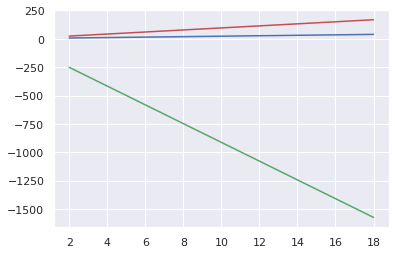

In [93]:
# Lets use LR as 0.1
lr=0.1
totalIterCount=100 # Total no of iterations allowed
itercount=0 #Current iteration number
lossThresh=0.05
deltaLoss=5  # Intially we set an arbitrary value greater than lossThresh
P=linearFunc(X,W)
initLoss=MSE(Y,P) # This is loss with current weights

# Lets plot the actual line and initial line 
plt.plot(X,linearFunc(X,W),c='r')# starting line in red
plt.plot(X,Y,c='b')# actual line in blue


# We will now do multiple iterations
# Stopping condition ? Either max iterations are reached or the loss is not reducing beyond a fixed threshold

while(True):
  if(itercount>=200):
    break
  if(deltaLoss <= lossThresh):
    break
  else:
    gradient=grad(X,Y,P)  #Calculate the gradient at this point
    W=W + lr*gradient
    P=linearFunc(X,W)     #Prediction with current weights
    currLoss=MSE(Y,P)     #Lets update the weights 
    print('currLoss',currLoss)
    deltaLoss=initLoss-currLoss  # Calculate diff in loss
    print('deltaLoss',deltaLoss)
    print('weightUpdate',lr*gradient)
    initLoss=currLoss
    itercount=itercount+1
    plt.plot(X,linearFunc(X,W),c='g')#  line after one iteration in green



##  Result with LR 0.1


In [94]:
currLoss

1066006.9629629632

In [95]:
deltaLoss

-1059371.2962962964

In [96]:
itercount

1

In [97]:
W

array([-82.66666667, -85.66666667])

- As can be seen in the graph above , the gradient descent algorithm jumped over the minima due to its very large learning rate in a single iteration 
- It exited the limiting conditions because the loss threshold condition was not met
- This clearly demostartes that too large a learning rate poses the risk of overshooting the minima and loss will will explode

##  Implement Gradient Descent with LR 0.00001

In [98]:
# Update the W back to the original
W=W_Copy.copy()

In [99]:
# We have already assigned an arbitrary value for weights (aka m and c here)
print('W',W)

#Lets also re-print our X,Y
print('X',X) # input values
print('Y',Y) # Actual Output

#Alrighty, we are all set to proceed

W [9. 6.]
X [ 2  4  6  8 10 12 14 16 18]
Y [ 7 11 15 19 23 27 31 35 39]


currLoss 6617.535185879628
deltaLoss 18.131480787038527
weightUpdate -0.009166666666666667


currLoss 6599.453250136663
deltaLoss 18.08193574296547
weightUpdate -0.009154138888888887


currLoss 6581.420724080495
deltaLoss 18.032526056167626
weightUpdate -0.009141628232407408


currLoss 6563.437472723618
deltaLoss 17.98325135687719
weightUpdate -0.009129134673823118


currLoss 6545.5033614472695
deltaLoss 17.93411127634863
weightUpdate -0.009116658189768891


currLoss 6527.618256000432
deltaLoss 17.88510544683777
weightUpdate -0.009104198756909541


currLoss 6509.782022498828
deltaLoss 17.8362335016036
weightUpdate -0.009091756351941765


currLoss 6491.994527423911
deltaLoss 17.787495074917388
weightUpdate -0.00907933095159411


currLoss 6474.255637621882
deltaLoss 17.738889802029007
weightUpdate -0.009066922532626929


currLoss 6456.565220302673
deltaLoss 17.69041731920879
weightUpdate -0.00905453107183234


currLoss 6438.923143038968
deltaLoss 17.642077263704778
weightUpdate -0.009042156546034168


currLoss 6421.329273765209
deltaLoss 17.593869273759083
weightUpdate -0.009029798932087923


currLoss 6403.783480776608
deltaLoss 17.545792988601534
weightUpdate -0.009017458206880736


currLoss 6386.285632728148
deltaLoss 17.497848048459673
weightUpdate -0.009005134347331332


currLoss 6368.835598633628
deltaLoss 17.45003409451965
weightUpdate -0.008992827330389978


currLoss 6351.433247864665
deltaLoss 17.402350768963515
weightUpdate -0.008980537133038443


currLoss 6334.078450149703
deltaLoss 17.354797714961933
weightUpdate -0.00896826373228996


currLoss 6316.771075573076
deltaLoss 17.3073745766269
weightUpdate -0.008956007105189163


currLoss 6299.510994573994
deltaLoss 17.260080999081765
weightUpdate -0.00894376722881207


currLoss 6282.298077945612
deltaLoss 17.212916628382118
weightUpdate -0.008931544080266028


currLoss 6265.132196834033
deltaLoss 17.165881111579438
weightUpdate -0.008919337636689664


currLoss 6248.013222737352
deltaLoss 17.118974096680176
weightUpdate -0.008907147875252857


currLoss 6230.941027504712
deltaLoss 17.072195232640297
weightUpdate -0.008894974773156676


currLoss 6213.91548333532
deltaLoss 17.02554416939256
weightUpdate -0.008882818307633366


currLoss 6196.936462777503
deltaLoss 16.97902055781651
weightUpdate -0.008870678455946267


currLoss 6180.003838727757
deltaLoss 16.932624049745755
weightUpdate -0.008858555195389807


currLoss 6163.117484429793
deltaLoss 16.886354297964317
weightUpdate -0.00884644850328944


currLoss 6146.277273473587
deltaLoss 16.840210956205738
weightUpdate -0.008834358357001611


currLoss 6129.483079794426
deltaLoss 16.794193679161253
weightUpdate -0.008822284733913709


currLoss 6112.734777671986
deltaLoss 16.74830212243978
weightUpdate -0.008810227611444028


currLoss 6096.032241729373
deltaLoss 16.702535942613395
weightUpdate -0.00879818696704172


currLoss 6079.375346932193
deltaLoss 16.65689479718003
weightUpdate -0.008786162778186762


currLoss 6062.763968587609
deltaLoss 16.6113783445835
weightUpdate -0.00877415502238991


currLoss 6046.197982343419
deltaLoss 16.565986244189844
weightUpdate -0.00876216367719264


currLoss 6029.677264187118
deltaLoss 16.520718156300973
weightUpdate -0.008750188720167144


currLoss 6013.201690444976
deltaLoss 16.475573742142842
weightUpdate -0.008738230128916247


currLoss 5996.771137781096
deltaLoss 16.430552663880007
weightUpdate -0.008726287881073398


currLoss 5980.385483196516
deltaLoss 16.385654584579243
weightUpdate -0.008714361954302597


currLoss 5964.044604028271
deltaLoss 16.34087916824501
weightUpdate -0.008702452326298382


currLoss 5947.748377948479
deltaLoss 16.296226079792177
weightUpdate -0.008690558974785776


currLoss 5931.496682963435
deltaLoss 16.251694985044196
weightUpdate -0.008678681877520234


currLoss 5915.289397412675
deltaLoss 16.20728555076039
weightUpdate -0.008666821012287626


currLoss 5899.1263999681
deltaLoss 16.162997444575012
weightUpdate -0.008654976356904162


currLoss 5883.007569633031
deltaLoss 16.118830335068196
weightUpdate -0.008643147889216397


currLoss 5866.9327857413355
deltaLoss 16.074783891695915
weightUpdate -0.008631335587101134


currLoss 5850.901927956503
deltaLoss 16.030857784832733
weightUpdate -0.008619539428465429


currLoss 5834.914876270756
deltaLoss 15.987051685746337
weightUpdate -0.008607759391246523


currLoss 5818.971511004149
deltaLoss 15.943365266607543
weightUpdate -0.008595995453411822


currLoss 5803.0717128036695
deltaLoss 15.899798200479381
weightUpdate -0.008584247592958826


currLoss 5787.215362642348
deltaLoss 15.856350161321643
weightUpdate -0.008572515787915114


currLoss 5771.402341818367
deltaLoss 15.813020823980878
weightUpdate -0.008560800016338297


currLoss 5755.6325319541775
deltaLoss 15.769809864189483
weightUpdate -0.008549100256315969


currLoss 5739.905814995606
deltaLoss 15.72671695857116
weightUpdate -0.008537416485965671


currLoss 5724.222073210972
deltaLoss 15.683741784634549
weightUpdate -0.008525748683434852


currLoss 5708.581189190212
deltaLoss 15.640884020759586
weightUpdate -0.008514096826900824


currLoss 5692.983045843995
deltaLoss 15.598143346217512
weightUpdate -0.008502460894570728


currLoss 5677.427526402853
deltaLoss 15.555519441141769
weightUpdate -0.00849084086468148


currLoss 5661.914514416303
deltaLoss 15.513011986549827
weightUpdate -0.00847923671549975


currLoss 5646.443893751972
deltaLoss 15.470620664331364
weightUpdate -0.0084676484253219


currLoss 5631.015548594738
deltaLoss 15.428345157233707
weightUpdate -0.00845607597247396


currLoss 5615.629363445855
deltaLoss 15.38618514888276
weightUpdate -0.00844451933531158


currLoss 5600.285223122093
deltaLoss 15.344140323762076
weightUpdate -0.008432978492219986


currLoss 5584.983012754871
deltaLoss 15.30221036722196
weightUpdate -0.008421453421613954


currLoss 5569.722617789403
deltaLoss 15.26039496546855
weightUpdate -0.008409944101937749


currLoss 5554.503923983845
deltaLoss 15.21869380555745
weightUpdate -0.0083984505116651


currLoss 5539.326817408424
deltaLoss 15.177106575421021
weightUpdate -0.008386972629299157


currLoss 5524.1911844446
deltaLoss 15.13563296382381
weightUpdate -0.008375510433372448


currLoss 5509.09691178422
deltaLoss 15.094272660380739
weightUpdate -0.008364063902446837


currLoss 5494.043886428645
deltaLoss 15.053025355574391
weightUpdate -0.008352633015113495


currLoss 5479.0319956879375
deltaLoss 15.011890740707713
weightUpdate -0.008341217749992842


currLoss 5464.061127179986
deltaLoss 14.970868507951309
weightUpdate -0.008329818085734518


currLoss 5449.1311688296955
deltaLoss 14.92995835029069
weightUpdate -0.008318434001017349


currLoss 5434.242008868123
deltaLoss 14.889159961572659
weightUpdate -0.008307065474549293


currLoss 5419.3935358316585
deltaLoss 14.848473036464384
weightUpdate -0.008295712485067408


currLoss 5404.585638561179
deltaLoss 14.80789727047977
weightUpdate -0.008284375011337816


currLoss 5389.818206201222
deltaLoss 14.767432359956729
weightUpdate -0.008273053032155656


currLoss 5375.091128199159
deltaLoss 14.727078002062626
weightUpdate -0.008261746526345043


currLoss 5360.404294304365
deltaLoss 14.68683389479429
weightUpdate -0.008250455472759039


currLoss 5345.7575945673925
deltaLoss 14.64669973697255
weightUpdate -0.008239179850279601


currLoss 5331.150919339148
deltaLoss 14.606675228244967
weightUpdate -0.008227919637817552


currLoss 5316.584159270077
deltaLoss 14.56676006907037
weightUpdate -0.008216674814312536


currLoss 5302.057205309341
deltaLoss 14.526953960736137
weightUpdate -0.008205445358732973


currLoss 5287.569948704001
deltaLoss 14.487256605340008
weightUpdate -0.00819423125007604


currLoss 5273.122280998211
deltaLoss 14.447667705790082
weightUpdate -0.008183032467367601


currLoss 5258.714094032396
deltaLoss 14.40818696581482
weightUpdate -0.008171848989662197


currLoss 5244.345279942447
deltaLoss 14.36881408994941
weightUpdate -0.008160680796042994


currLoss 5230.01573115892
deltaLoss 14.329548783526661
weightUpdate -0.008149527865621732


currLoss 5215.725340406219
deltaLoss 14.29039075270066
weightUpdate -0.008138390177538719


currLoss 5201.474000701806
deltaLoss 14.251339704413112
weightUpdate -0.008127267710962748


currLoss 5187.261605355392
deltaLoss 14.212395346414269
weightUpdate -0.0081161604450911


currLoss 5173.088047968142
deltaLoss 14.173557387250185
weightUpdate -0.008105068359149474


currLoss 5158.953222431875
deltaLoss 14.134825536267272
weightUpdate -0.00809399143239197


currLoss 5144.85702292828
deltaLoss 14.096199503595017
weightUpdate -0.008082929644101032


currLoss 5130.799343928109
deltaLoss 14.057679000170538
weightUpdate -0.008071882973587428


currLoss 5116.7800801904
deltaLoss 14.01926373770857
weightUpdate -0.008060851400190194


currLoss 5102.799126761688
deltaLoss 13.980953428712382
weightUpdate -0.0080498349032766


currLoss 5088.85637897521
deltaLoss 13.942747786478321
weightUpdate -0.008038833462242123


currLoss 5074.951732450132
deltaLoss 13.904646525077624
weightUpdate -0.008027847056510391


currLoss 5061.085083090772
deltaLoss 13.866649359360053
weightUpdate -0.00801687566553316


currLoss 5047.256327085803
deltaLoss 13.828756004969364
weightUpdate -0.008005919268790265


currLoss 5033.465360907486
deltaLoss 13.790966178316921
weightUpdate -0.007994977845789586


currLoss 5019.71208131091
deltaLoss 13.75327959657534
weightUpdate -0.007984051376067006


currLoss 5005.99638533319
deltaLoss 13.715695977720316
weightUpdate -0.00797313983918638


currLoss 4992.318170292722
deltaLoss 13.678215040467876
weightUpdate -0.007962243214739494


currLoss 4978.677333788404
deltaLoss 13.640836504318031
weightUpdate -0.007951361482346016


currLoss 4965.0737736988685
deltaLoss 13.603560089535677
weightUpdate -0.007940494621653475


currLoss 4951.507388181721
deltaLoss 13.566385517147864
weightUpdate -0.007929642612337215


currLoss 4937.9780756727805
deltaLoss 13.529312508940166
weightUpdate -0.007918805434100354


currLoss 4924.48573488531
deltaLoss 13.492340787470312
weightUpdate -0.007907983066673752


currLoss 4911.030264809273
deltaLoss 13.455470076037273
weightUpdate -0.007897175489815963


currLoss 4897.611564710565
deltaLoss 13.418700098707632
weightUpdate -0.007886382683313214


currLoss 4884.229534130267
deltaLoss 13.382030580298306
weightUpdate -0.007875604626979352


currLoss 4870.884072883892
deltaLoss 13.345461246374725
weightUpdate -0.007864841300655812


currLoss 4857.57508106063
deltaLoss 13.308991823262659
weightUpdate -0.007854092684211583


currLoss 4844.3024590226105
deltaLoss 13.272622038019108
weightUpdate -0.00784335875754316


currLoss 4831.0661074041545
deltaLoss 13.236351618455956
weightUpdate -0.007832639500574516


currLoss 4817.865927111017
deltaLoss 13.200180293137237
weightUpdate -0.007821934893257066


currLoss 4804.701819319667
deltaLoss 13.164107791350034
weightUpdate -0.007811244915569615


currLoss 4791.573685476537
deltaLoss 13.128133843129945
weightUpdate -0.0078005695475183365


currLoss 4778.481427297276
deltaLoss 13.09225817926108
weightUpdate -0.007789908769136728


currLoss 4765.4249467660375
deltaLoss 13.056480531238776
weightUpdate -0.007779262560485574


currLoss 4752.404146134726
deltaLoss 13.020800631311431
weightUpdate -0.00776863090165291


currLoss 4739.418927922274
deltaLoss 12.98521821245231
weightUpdate -0.007758013772753983


currLoss 4726.469194913911
deltaLoss 12.949733008362273
weightUpdate -0.007747411153931219


currLoss 4713.554850160438
deltaLoss 12.914344753473415
weightUpdate -0.007736823025354181


currLoss 4700.675796977496
deltaLoss 12.879053182941789
weightUpdate -0.007726249367219529


currLoss 4687.831938944851
deltaLoss 12.843858032645585
weightUpdate -0.007715690159750996


currLoss 4675.0231799056655
deltaLoss 12.808759039185134
weightUpdate -0.007705145383199337


currLoss 4662.249423965784
deltaLoss 12.773755939881084
weightUpdate -0.007694615017842298


currLoss 4649.510575493012
deltaLoss 12.738848472772588
weightUpdate -0.0076840990439845805


currLoss 4636.806539116402
deltaLoss 12.70403637661002
weightUpdate -0.007673597441957802


currLoss 4624.137219725539
deltaLoss 12.669319390863166
weightUpdate -0.007663110192120459


currLoss 4611.502522469832
deltaLoss 12.63469725570667
weightUpdate -0.007652637274857894


currLoss 4598.902352757797
deltaLoss 12.600169712034585
weightUpdate -0.007642178670582257


currLoss 4586.336616256359
deltaLoss 12.56573650143855
weightUpdate -0.00763173435973246


currLoss 4573.8052188901365
deltaLoss 12.531397366222336
weightUpdate -0.00762130432277416


currLoss 4561.308066840746
deltaLoss 12.497152049390934
weightUpdate -0.0076108885401997015


currLoss 4548.845066546092
deltaLoss 12.463000294653284
weightUpdate -0.007600486992528096


currLoss 4536.416124699675
deltaLoss 12.428941846417729
weightUpdate -0.007590099660304974


currLoss 4524.021148249885
deltaLoss 12.394976449789283
weightUpdate -0.007579726524102556


currLoss 4511.660044399316
deltaLoss 12.361103850569634
weightUpdate -0.0075693675645196155


currLoss 4499.3327206040585
deltaLoss 12.327323795257144
weightUpdate -0.00755902276218144


currLoss 4487.039084573016
deltaLoss 12.293636031042297
weightUpdate -0.007548692097739792


currLoss 4474.779044267212
deltaLoss 12.260040305804068
weightUpdate -0.007538375551872881


currLoss 4462.552507899103
deltaLoss 12.22653636810901
weightUpdate -0.007528073105285323


currLoss 4450.359383931889
deltaLoss 12.193123967213978
weightUpdate -0.007517784738708099


currLoss 4438.199581078828
deltaLoss 12.159802853061592
weightUpdate -0.0075075104328985315


currLoss 4426.073008302555
deltaLoss 12.126572776272951
weightUpdate -0.007497250168640238


currLoss 4413.979574814402
deltaLoss 12.093433488152186
weightUpdate -0.007487003926743095


currLoss 4401.91919007372
deltaLoss 12.06038474068282
weightUpdate -0.007476771688043213


currLoss 4389.891763787187
deltaLoss 12.027426286532318
weightUpdate -0.007466553433402889


currLoss 4377.897205908157
deltaLoss 11.994557879030253
weightUpdate -0.007456349143710571


currLoss 4365.935426635968
deltaLoss 11.961779272189233
weightUpdate -0.007446158799880834


currLoss 4354.00633641527
deltaLoss 11.929090220697617
weightUpdate -0.007435982382854329


currLoss 4342.109845935371
deltaLoss 11.896490479899512
weightUpdate -0.00742581987359776


currLoss 4330.245866129548
deltaLoss 11.863979805822964
weightUpdate -0.007415671253103844


currLoss 4318.414308174393
deltaLoss 11.831557955154494
weightUpdate -0.007405536502391271


currLoss 4306.61508348915
deltaLoss 11.799224685243644
weightUpdate -0.007395415602504669


currLoss 4294.848103735039
deltaLoss 11.766979754110253
weightUpdate -0.007385308534514579


currLoss 4283.113280814615
deltaLoss 11.734822920424449
weightUpdate -0.007375215279517409


currLoss 4271.410526871085
deltaLoss 11.702753943530297
weightUpdate -0.007365135818635402


currLoss 4259.739754287675
deltaLoss 11.670772583409416
weightUpdate -0.0073550701330165995


currLoss 4248.100875686957
deltaLoss 11.638878600718272
weightUpdate -0.007345018203834811


currLoss 4236.493803930196
deltaLoss 11.607071756760888
weightUpdate -0.007334980012289571


currLoss 4224.918452116714
deltaLoss 11.575351813481575
weightUpdate -0.007324955539606107


currLoss 4213.3747335832195
deltaLoss 11.543718533494939
weightUpdate -0.007314944767035312


currLoss 4201.862561903169
deltaLoss 11.512171680050415
weightUpdate -0.007304947675853699


currLoss 4190.381850886122
deltaLoss 11.480711017046815
weightUpdate -0.007294964247363364


currLoss 4178.932514577095
deltaLoss 11.449336309026876
weightUpdate -0.0072849944628919664


currLoss 4167.514467255911
deltaLoss 11.418047321184531
weightUpdate -0.007275038303792682


currLoss 4156.127623436566
deltaLoss 11.386843819344904
weightUpdate -0.007265095751444165


currLoss 4144.771897866591
deltaLoss 11.35572556997522
weightUpdate -0.007255166787250525


currLoss 4133.447205526405
deltaLoss 11.32469234018572
weightUpdate -0.007245251392641282


currLoss 4122.153461628685
deltaLoss 11.29374389771965
weightUpdate -0.00723534954907134


currLoss 4110.890581617733
deltaLoss 11.262880010952358
weightUpdate -0.007225461238020943


currLoss 4099.658481168839
deltaLoss 11.232100448894016
weightUpdate -0.007215586440995647


currLoss 4088.457076187649
deltaLoss 11.20140498119008
weightUpdate -0.007205725139526286


currLoss 4077.286282809545
deltaLoss 11.170793378104008
weightUpdate -0.007195877315168933


currLoss 4066.1460173990063
deltaLoss 11.140265410538632
weightUpdate -0.007186042949504869


currLoss 4055.0361965489915
deltaLoss 11.109820850014785
weightUpdate -0.007176222024140545


currLoss 4043.956737080306
deltaLoss 11.0794594686854
weightUpdate -0.007166414520707553


currLoss 4032.907556040991
deltaLoss 11.049181039315044
weightUpdate -0.007156620420862586


currLoss 4021.8885707056925
deltaLoss 11.018985335298566
weightUpdate -0.007146839706287407


currLoss 4010.89969857505
deltaLoss 10.988872130642449
weightUpdate -0.007137072358688813


currLoss 3999.940857375073
deltaLoss 10.958841199977087
weightUpdate -0.0071273183597986055


currLoss 3989.011965056527
deltaLoss 10.928892318545877
weightUpdate -0.007117577691373547


currLoss 3978.112939794324
deltaLoss 10.89902526220294
weightUpdate -0.007107850335195338


currLoss 3967.2436999869046
deltaLoss 10.86923980741949
weightUpdate -0.007098136273070569


currLoss 3956.40416425563
deltaLoss 10.839535731274736
weightUpdate -0.0070884354868307065


currLoss 3945.5942514441736
deltaLoss 10.809912811456343
weightUpdate -0.007078747958332038


currLoss 3934.813880617909
deltaLoss 10.780370826264516
weightUpdate -0.007069073669455651


currLoss 3924.062971063314
deltaLoss 10.750909554595182
weightUpdate -0.007059412602107396


currLoss 3913.3414422873548
deltaLoss 10.721528775959086
weightUpdate -0.007049764738217849


currLoss 3902.6492140168953
deltaLoss 10.692228270459509
weightUpdate -0.007040130059742285


currLoss 3891.986206198087
deltaLoss 10.663007818808182
weightUpdate -0.007030508548660637


currLoss 3881.3523389957754
deltaLoss 10.633867202311649
weightUpdate -0.007020900186977467


currLoss 3870.7475327928987
deltaLoss 10.604806202876716
weightUpdate -0.007011304956721933


currLoss 3860.1717081898987
deltaLoss 10.575824603000001
weightUpdate -0.007001722839947745


currLoss 3849.6247860041153
deltaLoss 10.546922185783387
weightUpdate -0.006992153818733151


currLoss 3839.106687269211
deltaLoss 10.51809873490447
weightUpdate -0.006982597875180882


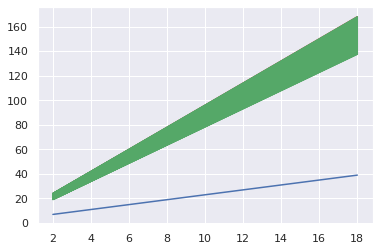

In [100]:
# Lets use LR as 0.1
lr=0.00001
totalIterCount=100 # Total no of iterations allowed
itercount=0 #Current iteration number
lossThresh=0.05
deltaLoss=5  # Intially we set an arbitrary value greater than lossThresh
P=linearFunc(X,W)
initLoss=MSE(Y,P) # This is loss with current weights

# Lets plot the actual line and initial line 
plt.plot(X,linearFunc(X,W),c='r')# starting line in red
plt.plot(X,Y,c='b')# actual line in blue


# We will now do multiple iterations
# Stopping condition ? Either max iterations are reached or the loss is not reducing beyond a fixed threshold

while(True):
  if(itercount>=200):
    break
  if(deltaLoss <= lossThresh):
    break
  else:
    gradient=grad(X,Y,P)  #Calculate the gradient at this point
    W=W + lr*gradient
    P=linearFunc(X,W)     #Prediction with current weights
    currLoss=MSE(Y,P)     #Lets update the weights 
    print('currLoss',currLoss)
    deltaLoss=initLoss-currLoss  # Calculate diff in loss
    print('deltaLoss',deltaLoss)
    print('weightUpdate',lr*gradient)
    initLoss=currLoss
    itercount=itercount+1
    plt.plot(X,linearFunc(X,W),c='g')#  line after one iteration in green



##  Result with LR 0.00001


In [101]:
currLoss

3839.106687269211

In [102]:
deltaLoss

10.51809873490447

In [103]:
itercount

200

In [104]:
W

array([7.39491829, 4.39491829])

- As can be seen in the graph above , the gradient descent algorithm was never able to reach the best fit line because the learning rate was too low i.e it could not converge
- Each green line indicates one iteration
- Vanilla Gradient descent took reached its maximum limit of iterartions which was 200 and had to exit
- This demostrates how too low a learning rate can be prohibitive

##  References
- The following references were used while creating this notebook:

- https://towardsdatascience.com/gradient-descent-from-scratch-e8b75fa986cc by Arseny Turin

- Post Graduation AI/ML Study Material by GL/UAT
